# <font color='orange'>**Prerequisites**</font>

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# installing prerequisites
!pip install pypower
!pip install pandapower

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for pypower: filename=PYPOWER-5.1.4-py2.py3-none-any.whl size=335539 sha256=952ef360e8dcdb5487a62fb85be6ba8fac8555e748093481114a509730f52a29
  Stored in directory: /root/.cache/pip/wheels/16/96/f8/4674b96d983b9f63ad29abc36358daed87dee38a6db86a92da
Successfully built pypower
     |████████████████████████████████| 4.3MB 2.8MB/s 
  Created wheel for pandapower: filename=pandapower-2.2.2-cp36-none-any.whl size=4276971 sha256=e8520736307ebe18ca322cf61823547f52011b9a978e3791228e02aaf245d0eb
  Stored in directory: /root/.cache/pip/wheels/46/e4/87/80e2ff3316ab96bc97c237ed15d04bebc1df15a2222817d407
Successfully built pandapower


In [0]:
from pypower import loadcase, runpf
from random import randint
import pandas as pd
import numpy as np
import pandapower.converter as pc

import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# <font color='orange'>**Data mining**</font>

In [4]:
ppc = loadcase.loadcase('drive/My Drive/cases/case9')
run = runpf.runpf(ppc, solvedcase='solved.py')

PYPOWER Version 5.1.4, 27-June-2018 -- AC Power Flow (Newton)


Newton's method power flow converged in 4 iterations.

Converged in 0.03 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              9     Total Gen Capacity     820.0        -900.0 to 900.0
Generators         3     On-line Capacity       820.0        -900.0 to 900.0
Committed Gens     3     Generation (actual)    319.0              35.0
Loads              3     Load                   315.0             115.0
  Fixed            3       Fixed                315.0             115.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches           9     Losses (I^2 * Z)         4.95             51.31
Transformers       0     Branch 

In [5]:
# for i in range(dim[0]):
#     # V_a
#     degree = randint(-360,360)
#     ppc['bus'][i][8] = degree
from math import pi

# 50.2005088966
# ppc['bus'][0][8] = 250
# ppc['bus'][1][8] = 47
# ppc['bus'][2][8] = 2
# ppc['bus'][3][8] = 25
# ppc['bus'][4][8] = 36
# ppc['bus'][5][8] = 10
# ppc['bus'][6][8] = 0
# ppc['bus'][7][8] = 5
# ppc['bus'][8][8] = 33

run = runpf.runpf(ppc, solvedcase='solved.py')

print(run[1])
    

PYPOWER Version 5.1.4, 27-June-2018 -- AC Power Flow (Newton)


Newton's method power flow converged in 4 iterations.

Converged in 0.04 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              9     Total Gen Capacity     820.0        -900.0 to 900.0
Generators         3     On-line Capacity       820.0        -900.0 to 900.0
Committed Gens     3     Generation (actual)    319.0              35.0
Loads              3     Load                   315.0             115.0
  Fixed            3       Fixed                315.0             115.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches           9     Losses (I^2 * Z)         4.95             51.31
Transformers       0     Branch 

In [0]:
run[0]['branch'][0]

array([ 1.00000000e+00,  4.00000000e+00,  0.00000000e+00,  5.76000000e-02,
        0.00000000e+00,  2.50000000e+02,  2.50000000e+02,  2.50000000e+02,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00, -3.60000000e+02,
        3.60000000e+02,  7.19547016e+01,  2.40689578e+01, -7.19547016e+01,
       -2.07530445e+01])

In [0]:
ppc['branch'][0]

array([ 1.00e+00,  4.00e+00,  0.00e+00,  5.76e-02,  0.00e+00,  2.50e+02,
        2.50e+02,  2.50e+02,  0.00e+00,  0.00e+00,  1.00e+00, -3.60e+02,
        3.60e+02])

In [0]:
run[0].keys()

dict_keys(['version', 'baseMVA', 'bus', 'gen', 'branch', 'areas', 'gencost', 'order', 'et', 'success'])

In [0]:
for key in run[0].keys():
    if key in ppc:
        print(key,':')
        print(ppc[key] == run[0][key])
        print()
    else:
        print(key,'does not exist in PPC')

version :
True

baseMVA :
True

bus :
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]]

gen :
[[ True False False  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True False  True  True  True  True  True  True  True  True  True
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


In [0]:
runBranch = pd.DataFrame(run[0]['branch'])
runBranch

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,4.0,0.0000,0.0576,0.000,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,71.954702,24.068958,-71.954702,-20.753045
1,4.0,5.0,0.0170,0.0920,0.158,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,30.728280,-0.585851,-30.554686,-13.687950
2,5.0,6.0,0.0390,0.1700,0.358,150.0,150.0,150.0,0.0,0.0,1.0,-360.0,360.0,-59.445314,-16.312050,60.893866,-12.427470
3,3.0,6.0,0.0000,0.0586,0.000,300.0,300.0,300.0,0.0,0.0,1.0,-360.0,360.0,85.000000,-3.649026,-85.000000,7.890678
4,6.0,7.0,0.0119,0.1008,0.209,150.0,150.0,150.0,0.0,0.0,1.0,-360.0,360.0,24.106134,4.536791,-24.010648,-24.400762
5,7.0,8.0,0.0085,0.0720,0.149,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-75.989352,-10.599238,76.495564,0.256239
6,8.0,2.0,0.0000,0.0625,0.000,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-163.000000,2.276190,163.000000,14.460120
7,8.0,9.0,0.0320,0.1610,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,86.504436,-2.532429,-84.039887,-14.281983
8,9.0,4.0,0.0100,0.0850,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-40.960113,-35.718017,41.226421,21.338895


In [0]:
ppcBranch = pd.DataFrame(ppc['branch'])
ppcBranch

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,4.0,0.0000,0.0576,0.000,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0
1,4.0,5.0,0.0170,0.0920,0.158,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0
2,5.0,6.0,0.0390,0.1700,0.358,150.0,150.0,150.0,0.0,0.0,1.0,-360.0,360.0
3,3.0,6.0,0.0000,0.0586,0.000,300.0,300.0,300.0,0.0,0.0,1.0,-360.0,360.0
4,6.0,7.0,0.0119,0.1008,0.209,150.0,150.0,150.0,0.0,0.0,1.0,-360.0,360.0
5,7.0,8.0,0.0085,0.0720,0.149,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0
6,8.0,2.0,0.0000,0.0625,0.000,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0
7,8.0,9.0,0.0320,0.1610,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0
8,9.0,4.0,0.0100,0.0850,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0


Check branches to see if they're equal:

In [0]:
i,j = ppcBranch.shape
for row in range(i):
    for col in range(j):
        if ppcBranch[col][row] != runBranch[col][row]:
            print('{}, {}'.format(row, col))

Branches are <b>equal</b>.

Check Buses to see if they're equal:

In [0]:
ppcBus = pd.DataFrame(ppc['bus'])
ppcBus

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
1,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
2,3.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
3,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
4,5.0,1.0,90.0,30.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
5,6.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
6,7.0,1.0,100.0,35.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
7,8.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
8,9.0,1.0,125.0,50.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9


In [0]:
runBus = pd.DataFrame(run[0]['bus'])
runBus

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,345.0,1.0,1.1,0.9
1,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.000000,9.668741,345.0,1.0,1.1,0.9
2,3.0,2.0,0.0,0.0,0.0,0.0,1.0,1.000000,4.771073,345.0,1.0,1.1,0.9
3,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.987007,-2.406644,345.0,1.0,1.1,0.9
4,5.0,1.0,90.0,30.0,0.0,0.0,1.0,0.975472,-4.017264,345.0,1.0,1.1,0.9
5,6.0,1.0,0.0,0.0,0.0,0.0,1.0,1.003375,1.925602,345.0,1.0,1.1,0.9
6,7.0,1.0,100.0,35.0,0.0,0.0,1.0,0.985645,0.621545,345.0,1.0,1.1,0.9
7,8.0,1.0,0.0,0.0,0.0,0.0,1.0,0.996185,3.799120,345.0,1.0,1.1,0.9
8,9.0,1.0,125.0,50.0,0.0,0.0,1.0,0.957621,-4.349934,345.0,1.0,1.1,0.9


In [0]:
i,j = ppcBus.shape
for row in range(i):
    for col in range(j):
        if ppcBus[col][row] - runBus[col][row] > 1e-6:
            print('{}, {}'.format(row, col),runBus[col][row],ppcBus[col][row])

3, 7 0.9870068523919054 1.0
3, 8 -2.4066439195194103 0.0
4, 7 0.9754721770850531 1.0
4, 8 -4.01726432670755 0.0
6, 7 0.9856448817249468 1.0
7, 7 0.9961852458090699 1.0
8, 7 0.9576210404299043 1.0
8, 8 -4.349933576561007 0.0


They are <b>NOT equal</b>.            

In [0]:
res = pd.DataFrame(run[0]['order']).transpose()
res

,e2i,i2e,status,bus,branch,gen,gencost,areas
bus,"[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]","{'on': [0, 1, 2, 3, 4, 5, 6, 7, 8], 'off': []}",NaN,NaN,NaN,NaN,NaN
gen,"[0, 1, 2]","[0, 1, 2]","{'on': [0, 1, 2], 'off': []}",NaN,NaN,NaN,NaN,NaN
branch,NaN,NaN,"{'on': [0, 1, 2, 3, 4, 5, 6, 7, 8], 'off': []}",NaN,NaN,NaN,NaN,NaN
areas,NaN,NaN,"{'on': [0], 'off': []}",NaN,NaN,NaN,NaN,NaN
state,e,e,e,e,e,e,e,e
int,NaN,NaN,NaN,"[[0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,...","[[0.0, 3.0, 0.0, 0.0576, 0.0, 250.0, 250.0, 25...","[[0, 71, 24, 300, -300, 1, 100, 1, 250, 10, 0,...","[[2.0, 1500.0, 0.0, 3.0, 0.11, 5.0, 150.0], [2...","[[1, 4]]"


In [0]:
pd.DataFrame(res['branch']['int'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,3.0,0.0000,0.0576,0.000,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,71.954702,24.068958,-71.954702,-20.753045
1,3.0,4.0,0.0170,0.0920,0.158,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,30.728280,-0.585851,-30.554686,-13.687950
2,4.0,5.0,0.0390,0.1700,0.358,150.0,150.0,150.0,0.0,0.0,1.0,-360.0,360.0,-59.445314,-16.312050,60.893866,-12.427470
3,2.0,5.0,0.0000,0.0586,0.000,300.0,300.0,300.0,0.0,0.0,1.0,-360.0,360.0,85.000000,-3.649026,-85.000000,7.890678
4,5.0,6.0,0.0119,0.1008,0.209,150.0,150.0,150.0,0.0,0.0,1.0,-360.0,360.0,24.106134,4.536791,-24.010648,-24.400762
5,6.0,7.0,0.0085,0.0720,0.149,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-75.989352,-10.599238,76.495564,0.256239
6,7.0,1.0,0.0000,0.0625,0.000,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-163.000000,2.276190,163.000000,14.460120
7,7.0,8.0,0.0320,0.1610,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,86.504436,-2.532429,-84.039887,-14.281983
8,8.0,3.0,0.0100,0.0850,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-40.960113,-35.718017,41.226421,21.338895


In [0]:
pc.from_ppc(ppc).keys()

dict_keys(['bus', 'load', 'sgen', 'storage', 'gen', 'switch', 'shunt', 'ext_grid', 'line', 'trafo', 'trafo3w', 'impedance', 'dcline', 'ward', 'xward', 'measurement', 'pwl_cost', 'poly_cost', 'controller', 'line_geodata', 'bus_geodata', '_empty_res_bus', '_empty_res_ext_grid', '_empty_res_line', '_empty_res_trafo', '_empty_res_trafo3w', '_empty_res_load', '_empty_res_sgen', '_empty_res_storage', '_empty_res_gen', '_empty_res_shunt', '_empty_res_impedance', '_empty_res_dcline', '_empty_res_ward', '_empty_res_xward', '_ppc', '_is_elements', '_pd2ppc_lookups', 'version', 'converged', 'name', 'f_hz', 'sn_mva', 'std_types', 'res_bus', 'res_line', 'res_trafo', 'res_trafo3w', 'res_impedance', 'res_ext_grid', 'res_load', 'res_sgen', 'res_storage', 'res_shunt', 'res_gen', 'res_ward', 'res_xward', 'res_dcline', 'user_pf_options'])

In [0]:
pc.from_ppc(ppc)['gen']

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,type,controllable,min_p_mw,max_p_mw
0,None,1,163.0,1.0,NaN,-300.0,300.0,1.0,False,True,None,True,10.0,300.0
1,None,2,85.0,1.0,NaN,-300.0,300.0,1.0,False,True,None,True,10.0,270.0


In [0]:
from random import randint

def create_a_case(bus=9):
    # Importing the case
    ppc = loadcase.loadcase('drive/My Drive/cases/case'+str(bus))
    
    # Modification to the default values of the case
    # To be deployed ...
    ppc['gen'][0, 1] = randint(0, 400)
    ppc['gen'][1, 1] = randint(0, 400)
    ppc['gen'][2, 1] = randint(0, 400)
    ppc['bus'][4, 2] = randint(0, 400)
    ppc['bus'][6, 2] = randint(0, 400)
    ppc['bus'][8, 2] = randint(0, 400)
    
    # Calculating the data
    run, success = runpf.runpf(ppc,)
    
    # Check to see if it was successful
    if not success:
        return create_a_case(bus=bus)
        
    
    # Adding number of buses
    X = np.array([bus])
    
    # Adding voltage magnitude of BUSES
    X = np.append(X, run['bus'][:,7])
    
    # Adding voltage angle of BUSES
    X = np.append(X, run['bus'][:,8])
    
    # Adding from bus to bus of BRANCHES
    X = np.append(X, run['branch'].flatten())
    
    # Declaring Y with current gen values
    Y = run['gen'][:,[1,2]].flatten()
    
    # Filling Y with 0s until 2n buses meet
    while len(Y) < (2 * bus):
        Y = np.append(Y, [0])
    
    
    return X, Y

In [115]:
# testing the function create_a_case()
X, Y = create_a_case()
print(X, Y)

PYPOWER Version 5.1.4, 27-June-2018 -- AC Power Flow (Newton)


Newton's method power flow converged in 5 iterations.

Converged in 0.04 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              9     Total Gen Capacity     820.0        -900.0 to 900.0
Generators         3     On-line Capacity       820.0        -900.0 to 900.0
Committed Gens     3     Generation (actual)    356.0             430.0
Loads              3     Load                   304.0             115.0
  Fixed            3       Fixed                304.0             115.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches           9     Losses (I^2 * Z)        51.84            426.97
Transformers       0     Branch 

In [0]:
def create_n_cases(n=60000, bus=9):
    X, Y = create_a_case(bus=bus)
    for i in range(n - 1):
        x, y = create_a_case(bus=bus)
        X = np.vstack((X, x))
        Y = np.vstack((Y, y))
        print(str(((i + 1) / (n - 1)) * 100))
    return X, Y

In [116]:
#testing the function create_n_cases()
X, Y = create_n_cases(n=40000)

Streaming output truncated to the last 5000 lines.
Voltage Magnitude   0.869 p.u. @ bus 5          1.000 p.u. @ bus 1   
Voltage Angle     -16.71 deg   @ bus 9         24.11 deg   @ bus 3   
P Losses (I^2*R)             -                 17.15 MW    @ line 5-6
Q Losses (I^2*X)             -                 87.64 MVAr  @ line 3-6

|     Bus Data                                                                 |
 Bus      Voltage          Generation             Load        
  #   Mag(pu) Ang(deg)   P (MW)   Q (MVAr)   P (MW)   Q (MVAr)
----- ------- --------  --------  --------  --------  --------
    1  1.000    0.000*   219.00    134.00       -         -   
    2  1.000    3.655    128.00     70.00       -         -   
    3  1.000   24.109    368.00    118.00       -         -   
    4  0.931   -7.817       -         -         -         -   
    5  0.869  -11.445       -         -      243.00     30.00 
    6  0.955   11.059       -         -         -         -   
    7  0.933   -0.01

In [117]:
print(X.shape)
print(Y.shape)

(40000, 172)
(40000, 18)


In [0]:
np.savetxt('drive/My Drive/X.csv', X, delimiter=',')
np.savetxt('drive/My Drive/Y.csv', Y, delimiter=',')

In [0]:
xpd = pd.DataFrame(X)
ypd = pd.DataFrame(Y)
data = pd.concat([ypd,xpd], axis=1)

In [0]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,0,1,2,3,4,5,6,7,8,9,10,11,12,...,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171
0,1,335,133,2,173,73,3,207,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,1.0,1.0,1.0,0.943136,0.939407,0.973895,0.929567,0.960051,0.876473,0.0,-15.388674,-7.461890,...,-360.0,360.0,-173.0,-51.592112,173.0,73.691787,8.0,9.0,0.032,0.161,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,61.010007,26.302023,-59.150931,-42.804049,9.0,4.0,0.01,0.085,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-265.849069,-7.195951,275.049215,70.809343
1,1,206,80,2,199,38,3,144,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,1.0,1.0,1.0,0.961279,0.923541,0.990234,0.973240,0.983169,0.917351,0.0,8.309779,4.225457,...,-360.0,360.0,-199.0,-13.838629,199.0,39.567759,8.0,9.0,0.032,0.161,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,133.392879,13.649370,-127.234546,-10.330002,9.0,4.0,0.01,0.085,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-94.765454,-39.669998,95.956316,34.255136
2,1,278,184,2,400,173,3,218,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,1.0,1.0,1.0,0.907831,0.830366,0.948891,0.904269,0.926188,0.832398,0.0,22.089822,6.589653,...,-360.0,360.0,-400.0,-54.376463,400.0,173.104746,8.0,9.0,0.032,0.161,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,194.504761,38.993618,-179.378708,13.383466,9.0,4.0,0.01,0.085,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-99.621292,-63.383466,101.527247,66.234088
3,1,502,273,2,5,106,3,290,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,1.0,1.0,1.0,0.890842,0.832110,0.937666,0.890847,0.933280,0.847339,0.0,-44.757998,-21.395432,...,-360.0,360.0,-5.0,-99.621057,5.0,106.760280,8.0,9.0,0.032,0.161,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-70.668742,57.918165,74.368300,-63.616385,9.0,4.0,0.01,0.085,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-243.368300,13.616385,251.672883,43.670640
4,1,-263,181,2,99,61,3,324,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,1.0,1.0,1.0,0.908311,0.872903,0.964134,0.948647,0.963596,0.875679,0.0,37.596695,55.978089,...,-360.0,360.0,-99.0,-52.944516,99.0,61.428559,8.0,9.0,0.032,0.161,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,167.416387,29.736806,-157.091363,-3.727585,9.0,4.0,0.01,0.085,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,104.091363,-46.272415,-102.474647,46.006285


In [0]:
data.to_csv('drive/My Drive/YX.csv', index=False,sep=',')

# <font color='orange'>**Applying Machine Learning**

## <font color='purple'>**Dataset**

In [124]:
# importing saved X and Y
X = pd.read_csv('drive/My Drive/X.csv',header=None)
Y = pd.read_csv('drive/My Drive/Y.csv',header=None)

(40000, 172)

In [0]:
# partition data to training and testing datasets
X_train = X.sample(frac=0.8,random_state=0)
X_test = X.drop(X_train.index)

Y_train = Y.sample(frac=0.8,random_state=0)
Y_test = Y.drop(Y_train.index)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


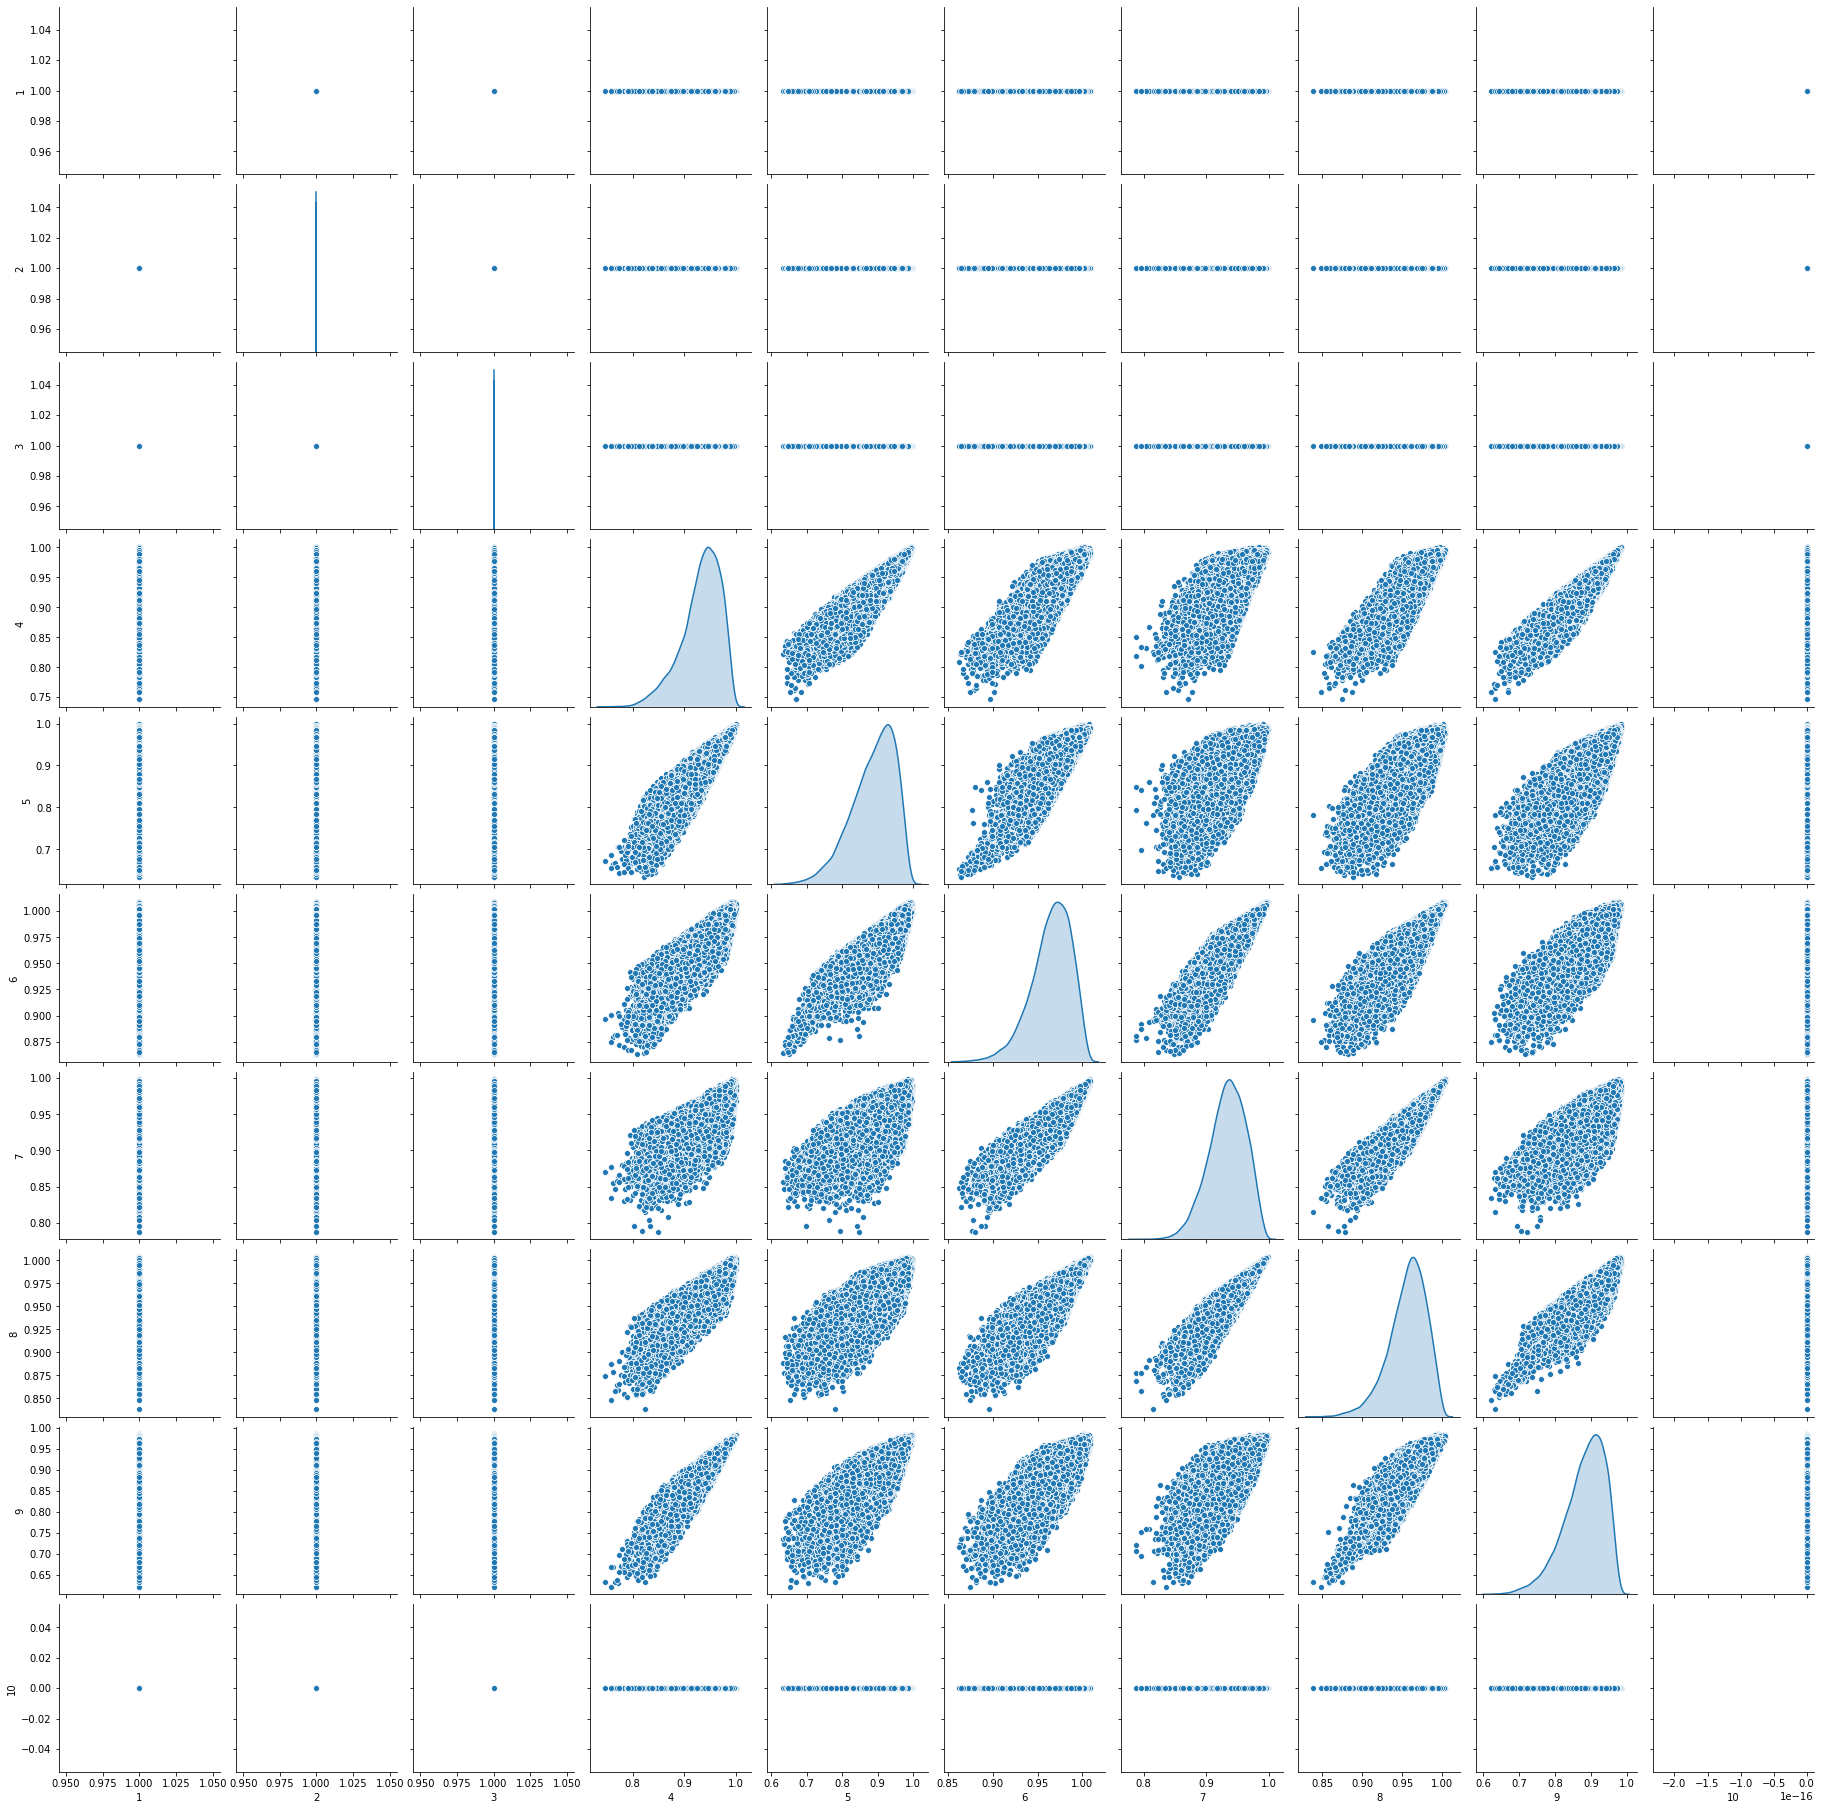

In [126]:
sns.pairplot(X_train[[1,2,3,4,5,6,7,8,9,10]], diag_kind="kde")

## <font color='purple'>**Models**</font>

### <font color='green'>**Basic Neural Network**</font><br>


In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(172, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(18)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [134]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 172)               29756     
_________________________________________________________________
dense_44 (Dense)             (None, 128)               22144     
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_46 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_47 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_48 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_49 (Dense)             (None, 128)              

In [135]:
example_batch = X[:3]
example_result = model.predict(example_batch)
example_result

array([[ 17.5,  35.7,  21. ,  -0.5,  27.2,  14.9, -17.8,   9.5,  11.1,
         -4.3,  17.5, -52.8,   3.9,   9.2, -36.3,  31.8, -13. ,  -3.5],
       [ 10.7,  28.3,  15.7,  -9.6,  26.5,  16.1, -12.1,   5.4,  -1.8,
         -6.3,  15.6, -50.8,   7.7,  -0.7, -30.1,  24.8,  -9.8,  -2.2],
       [ 17. ,  46.9,  14.3,  -4.8,  35.2,  20.3, -17.6,  11.7,   5.8,
         -4.5,  30.1, -56.9,   5.7,   0.3, -39.3,  37.6, -12.1, -15.1]],
      dtype=float32)

In [136]:
EPOCHS = 1000

history = model.fit(
  X_train, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:666.0234,  mae:12.7413,  mse:666.0234,  val_loss:322.0856,  val_mae:9.0977,  val_mse:322.0856,  
....................................................................................................
Epoch: 100, loss:18.7585,  mae:2.2876,  mse:18.7585,  val_loss:11.9468,  val_mae:2.0096,  val_mse:11.9468,  
....................................................................................................
Epoch: 200, loss:12.1602,  mae:1.8589,  mse:12.1602,  val_loss:14.0577,  val_mae:2.0513,  val_mse:14.0577,  
....................................................................................................
Epoch: 300, loss:9.2693,  mae:1.6165,  mse:9.2693,  val_loss:7.1464,  val_mae:1.5278,  val_mse:7.1464,  
....................................................................................................
Epoch: 400, loss:7.9458,  mae:1.4821,  mse:7.9458,  val_loss:6.5508,  val_mae:1.3829,  val_mse:6.5508,  
.......................................................

In [144]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,5.017799,1.128489,5.017799,2.738189,0.837613,2.738189,995
996,5.033642,1.122531,5.033642,5.398440,1.134556,5.398440,996
997,5.033756,1.121953,5.033756,2.196845,0.730108,2.196845,997
998,5.010855,1.121002,5.010855,5.479821,1.157804,5.479821,998
999,4.955774,1.113538,4.955774,3.253652,0.951849,3.253652,999


Text(0, 0.5, 'MAE')

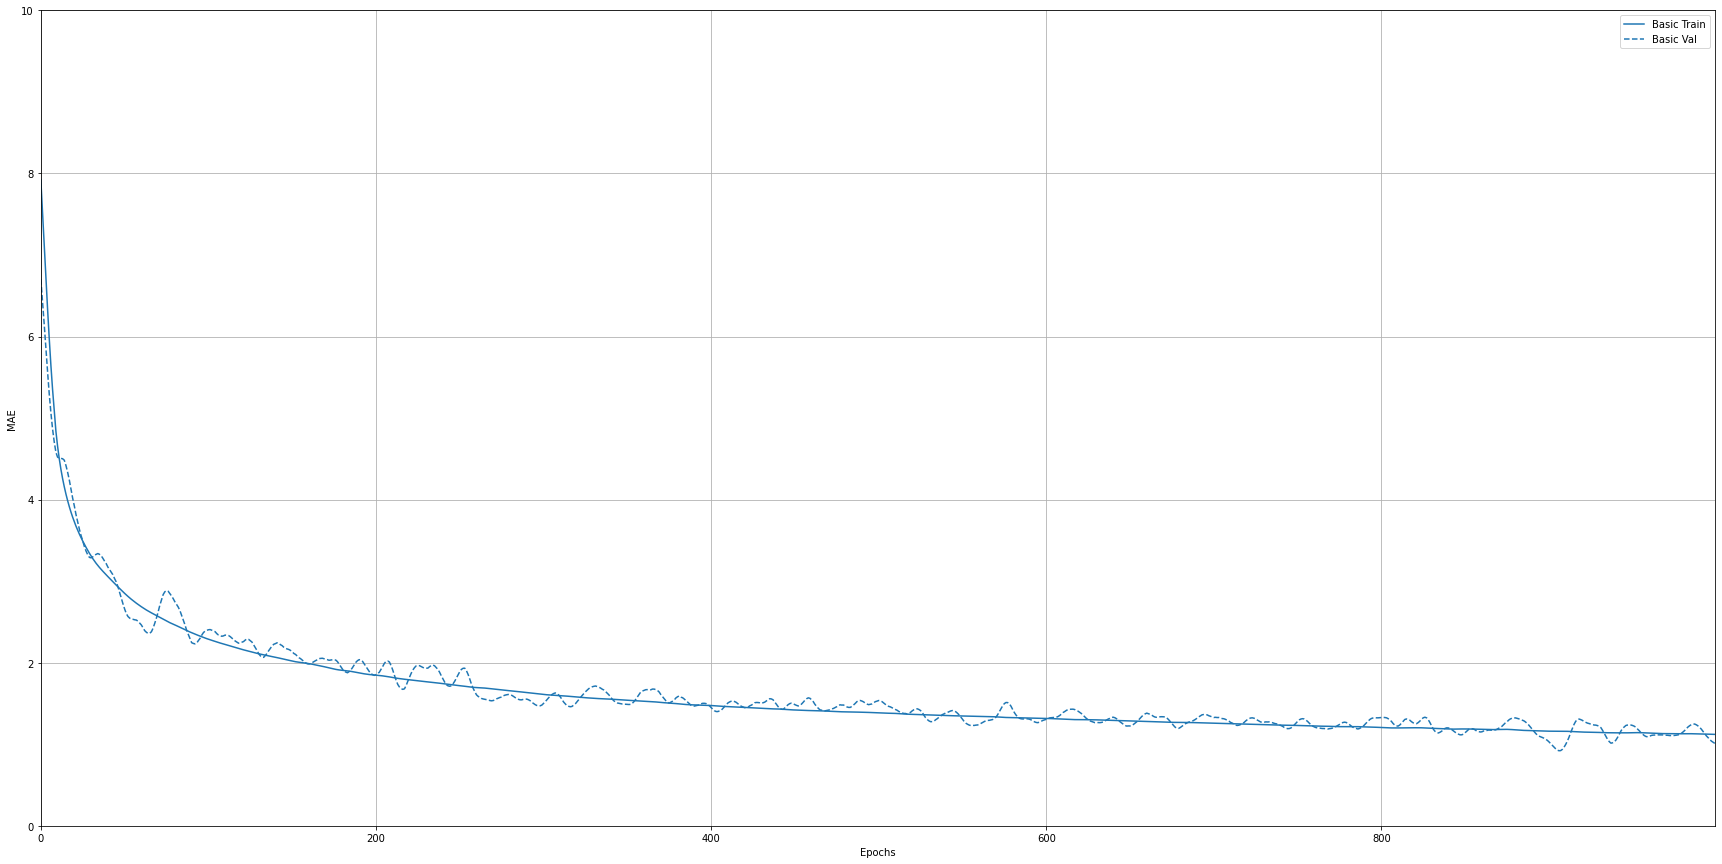

In [145]:
plt.figure(figsize=(30,15))
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

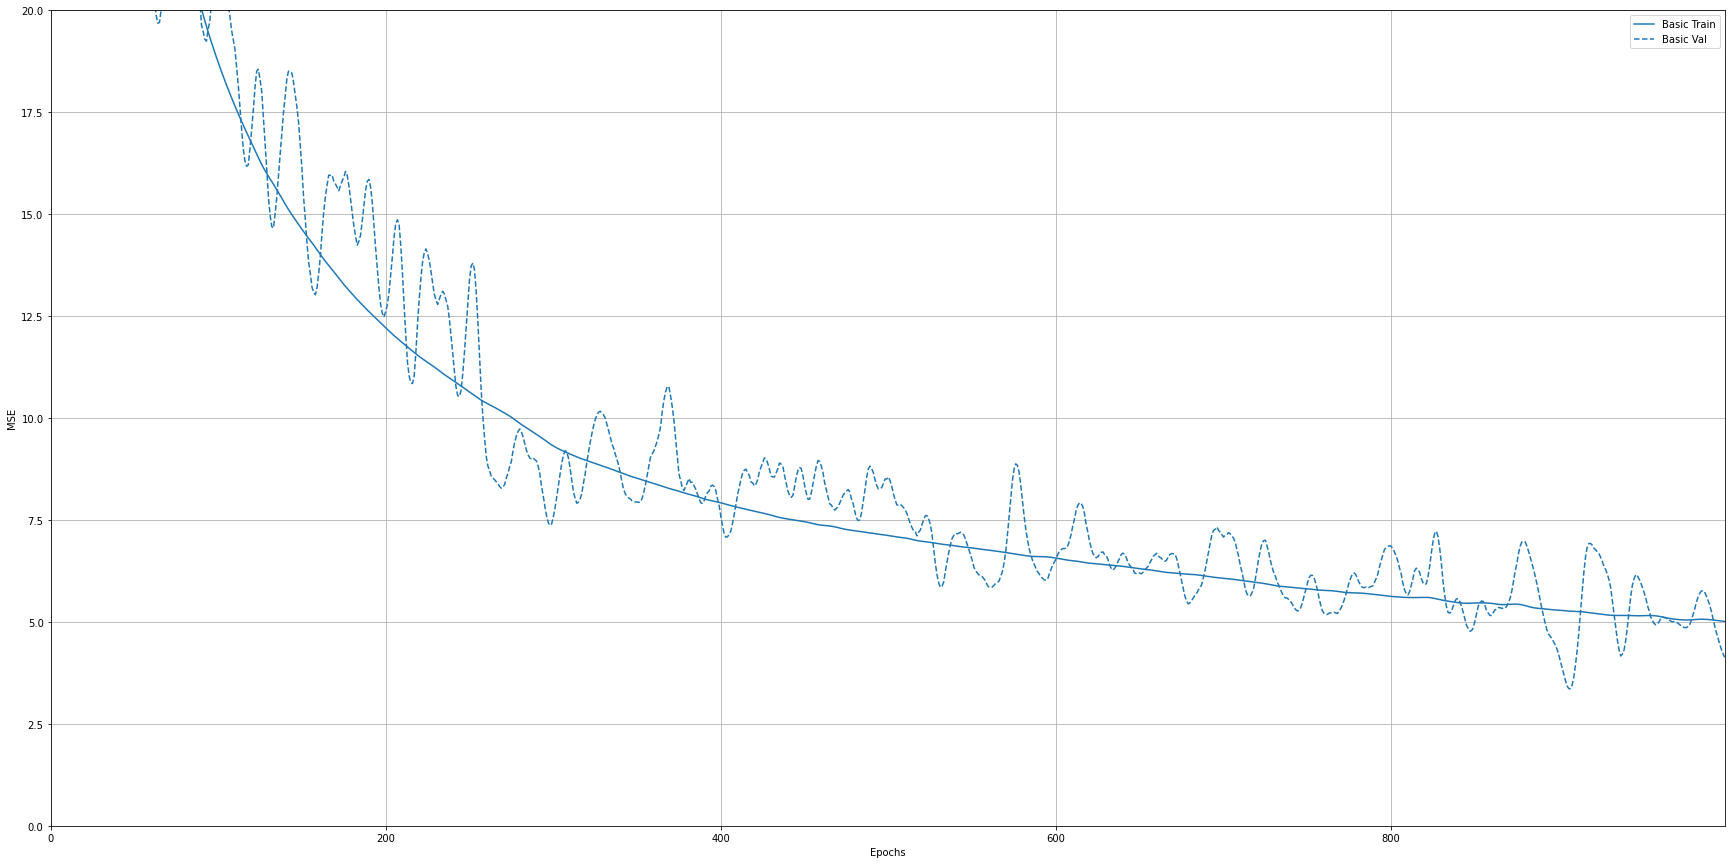

In [146]:
plt.figure(figsize=(30,15))
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE')

In [147]:
loss, mae, mse = model.evaluate(X_test, Y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

250/250 - 0s - loss: 3.2618 - mae: 0.9521 - mse: 3.2618
Testing set Mean Abs Error:  0.95 MPG


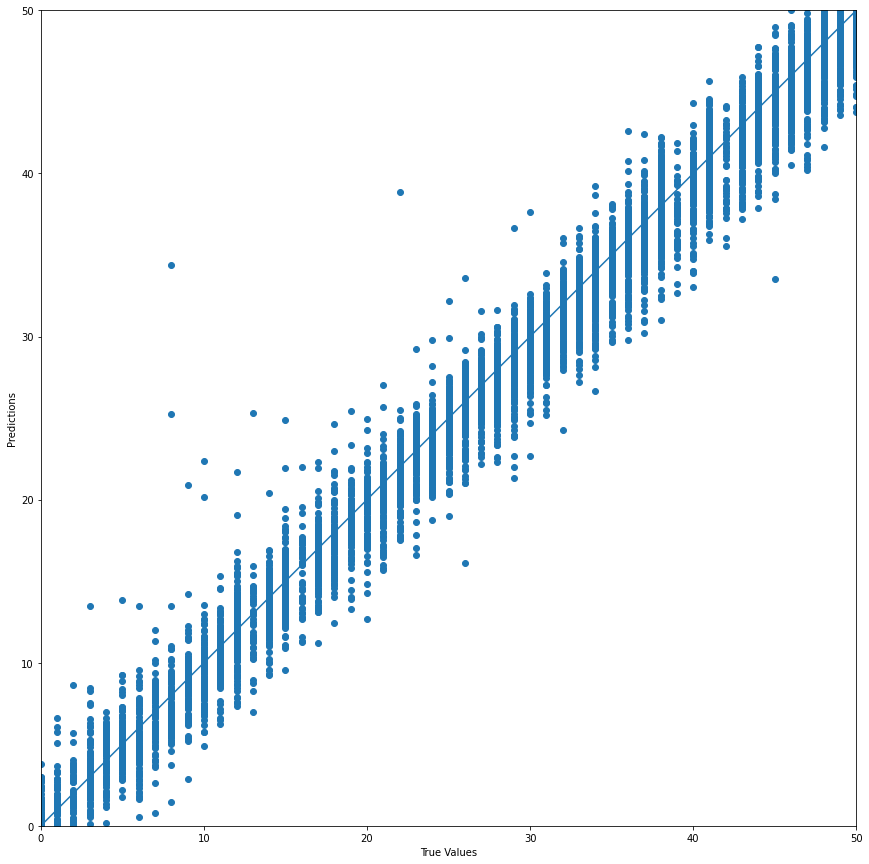

In [157]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(15,15))
a = plt.axes(aspect='equal')
plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [0]:
test_predictions = model.predict(X_test)
error = test_predictions - Y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [0]:
x,y = create_n_cases(n=3)

In [150]:
y_pred = model.predict(x)
np.set_printoptions(precision=1)
np.set_printoptions(suppress=True)
for i in range(len(y)):
  print('prediction:')
  print(y_pred[i])
  print('actual num:')
  print(y[i])
  print('===========================')

prediction:
[385.7 179.7 126.6  57.1 277.   88.5   0.3   0.3  -0.3   0.3   0.3   0.3
   0.3  -0.3   0.3  -0.3   0.3  -0.3]
actual num:
[392 181 129  59 280  89   0   0   0   0   0   0   0   0   0   0   0   0]
prediction:
[313.  147.6 324.8 108.5 197.7  65.7   0.2   0.2  -0.2   0.2   0.2   0.2
   0.2  -0.2   0.2  -0.2   0.2  -0.2]
actual num:
[316 146 328 112 202  68   0   0   0   0   0   0   0   0   0   0   0   0]
prediction:
[242.8 149.4 359.2 142.7 266.5 117.4   0.2   0.2  -0.2   0.2   0.2   0.2
   0.2  -0.2   0.2  -0.2   0.2  -0.2]
actual num:
[246 149 365 145 270 116   0   0   0   0   0   0   0   0   0   0   0   0]


### <font color='green'>**Convolutional Neural Network**</font>

In [0]:
def build_model():
  model = keras.models.Sequential()
  model.add(layers.Conv1D(32, (3), activation='relu', input_shape=(1, 172)))
  model.add(layers.MaxPooling2D((2)))
  model.add(layers.Conv1D(64, (3), activation='relu'))
  model.add(layers.MaxPooling2D((2)))
  model.add(layers.Conv1D(18, (3), activation='relu'))
  return model


In [171]:
model = build_model()

ValueError: ignored